In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve, auc)
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [16]:
df = pd.read_csv(r'C:\Users\hp\Desktop\Project Works and Files\Finance Project Credit Risk  Loan Analytics\DataSet\UCI_Credit_Card.csv')

print("Shape (rows, cols):", df.shape)
display(df.head())
display(df.info())
display(df.describe())

Shape (rows, cols): (30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

None

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [18]:
# Rename columns for consistency
df = df.rename(columns={'PAY_0': 'PAY_1', 'default.payment.next.month': 'DEFAULT'})

# Drop ID column
df = df.drop(columns=['ID'])

# Encode categorical variables
df['SEX'] = df['SEX'].replace({1: 'Male', 2: 'Female'})
df['EDUCATION'] = df['EDUCATION'].replace({
    0: 'Others', 1: 'Graduate School', 2: 'University', 3: 'High School',
    4: 'Others', 5: 'Others', 6: 'Others'
})
df['MARRIAGE'] = df['MARRIAGE'].replace({0: 'Others', 1: 'Married', 2: 'Single', 3: 'Others'})

# Convert to category dtype
df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')

print("✅ Data Cleaning Completed!")
print(df[['SEX', 'EDUCATION', 'MARRIAGE']].head(10))

# Check unique values and missing values
print("\n📊 Unique Value Counts:")
print(df[['SEX', 'EDUCATION', 'MARRIAGE']].nunique())

print("\n🔍 Missing Values per Column:")
print(df.isnull().sum())

✅ Data Cleaning Completed!
      SEX        EDUCATION MARRIAGE
0  Female       University  Married
1  Female       University   Single
2  Female       University   Single
3  Female       University  Married
4    Male       University  Married
5    Male  Graduate School   Single
6    Male  Graduate School   Single
7  Female       University   Single
8  Female      High School  Married
9    Male      High School   Single

📊 Unique Value Counts:
SEX          2
EDUCATION    4
MARRIAGE     3
dtype: int64

🔍 Missing Values per Column:
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64


In [20]:
# Log-transform LIMIT_BAL to reduce skew
df['LIMIT_BAL_LOG'] = np.log1p(df['LIMIT_BAL'])

# Cap age values above 70
df['AGE'] = np.where(df['AGE'] > 70, 70, df['AGE'])

# Define large financial columns
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_cols = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

# Use RobustScaler
scaler = RobustScaler()
df[bill_cols] = scaler.fit_transform(df[bill_cols])
df[pay_cols] = scaler.fit_transform(df[pay_cols])

print("✅ Outlier treatment & scaling done!")
print("\nLIMIT_BAL (original vs log-transformed):")
print(df[['LIMIT_BAL', 'LIMIT_BAL_LOG']].head())

✅ Outlier treatment & scaling done!

LIMIT_BAL (original vs log-transformed):
   LIMIT_BAL  LIMIT_BAL_LOG
0    20000.0       9.903538
1   120000.0      11.695255
2    90000.0      11.407576
3    50000.0      10.819798
4    50000.0      10.819798


In [22]:
# 1️⃣ CREDIT UTILIZATION METRICS
bill_cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
df['avg_bill_ratio'] = (df[bill_cols].mean(axis=1) / df['LIMIT_BAL']).replace([np.inf, -np.inf], 0)
df['max_bill_ratio'] = (df[bill_cols].max(axis=1) / df['LIMIT_BAL']).replace([np.inf, -np.inf], 0)

# 2️⃣ PAYMENT BEHAVIOR METRICS
pay_amt_cols = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
df['avg_payment_ratio'] = (df[pay_amt_cols].sum(axis=1) / df[bill_cols].sum(axis=1)).replace([np.inf, -np.inf, np.nan], 0)
df['missed_payment_count'] = (df[pay_amt_cols].values < df[bill_cols].values).sum(axis=1)

# 3️⃣ DELINQUENCY METRICS
delay_cols = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
df['max_delay'] = df[delay_cols].max(axis=1)
df['avg_delay'] = df[delay_cols].mean(axis=1)
df['num_delays'] = (df[delay_cols] > 0).sum(axis=1)

# 4️⃣ CUSTOMER AGE GROUP FLAGS
df['is_young_customer'] = np.where(df['AGE'] < 30, 1, 0)
df['is_senior_customer'] = np.where(df['AGE'] > 60, 1, 0)

# 5️⃣ SUMMARY METRICS
df['avg_bill_amt'] = df[bill_cols].mean(axis=1)
df['avg_pay_amt'] = df[pay_amt_cols].mean(axis=1)
df['pay_to_limit_ratio'] = (df['avg_pay_amt'] / df['LIMIT_BAL']).replace([np.inf, -np.inf], 0)

print("✅ Feature Engineering Completed Successfully!")
print("Shape after feature engineering:", df.shape)
display(df.head())

✅ Feature Engineering Completed Successfully!
Shape after feature engineering: (30000, 37)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,LIMIT_BAL_LOG,avg_bill_ratio,max_bill_ratio,avg_payment_ratio,missed_payment_count,max_delay,avg_delay,num_delays,is_young_customer,is_senior_customer,avg_bill_amt,avg_pay_amt,pay_to_limit_ratio
0,20000.0,Female,University,Married,24,2,2,-1,-1,-2,-2,-0.290695,-0.296584,-0.337391,-0.365126,-0.373848,-0.356074,-0.524214,-0.316775,-0.437424,-0.403524,-0.396930,-0.386374,1,9.903538,-1.683098e-05,-0.000015,1.220587,6,2,-0.333333,2,1,0,-0.336620,-0.410873,-2.054367e-05
1,120000.0,Female,University,Single,26,-1,2,0,0,0,2,-0.310071,-0.319150,-0.302730,-0.302419,-0.302504,-0.288055,-0.524214,-0.242141,-0.194411,-0.134508,-0.396930,0.128791,1,11.695255,-2.534622e-06,-0.000002,0.747105,2,2,0.500000,2,1,0,-0.304155,-0.227235,-1.893628e-06
2,90000.0,Female,University,Single,34,0,0,0,0,0,0,0.107937,-0.117549,-0.113559,-0.090477,-0.065180,-0.031747,-0.145282,-0.122150,-0.194411,-0.134508,-0.132310,0.901539,0,11.407576,-5.751369e-07,0.000001,-0.556640,5,0,0.000000,0,0,0,-0.051762,0.028813,3.201442e-07
3,50000.0,Female,University,Married,37,0,0,0,0,0,0,0.387339,0.443008,0.507883,0.177504,0.224139,0.260230,-0.024963,0.002400,-0.145808,-0.107606,-0.114051,-0.128791,0,10.819798,6.667006e-06,0.000010,-0.259397,6,0,0.000000,0,0,0,0.333350,-0.086470,-1.729399e-06
4,50000.0,Male,University,Married,57,-1,0,-1,0,0,0,-0.216654,-0.254500,0.273859,0.036183,0.021506,0.042968,-0.024963,8.320614,1.992710,2.017621,-0.214607,-0.211475,0,10.819798,-3.221240e-07,0.000005,-122.933002,2,0,-0.333333,0,0,0,-0.016106,1.979983,3.959967e-05


C:\Users\hp\AppData\Local\Temp\ipykernel_35136\4281261314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='DEFAULT', palette='viridis')


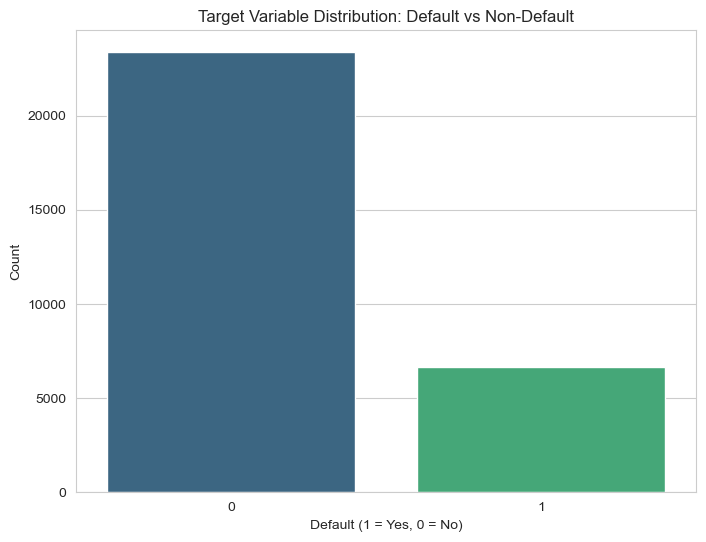

Target Variable Proportions:
DEFAULT
0    0.7788
1    0.2212
Name: proportion, dtype: float64


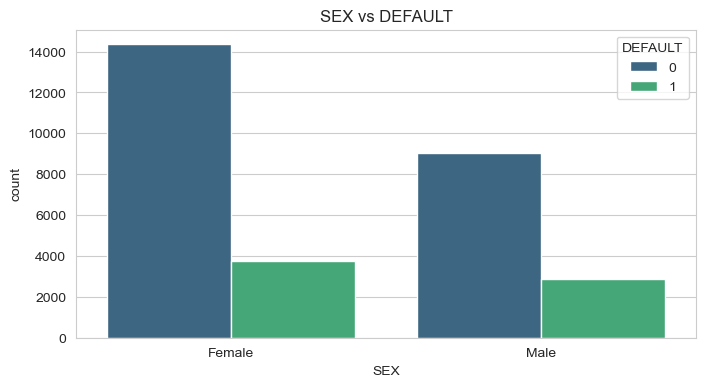

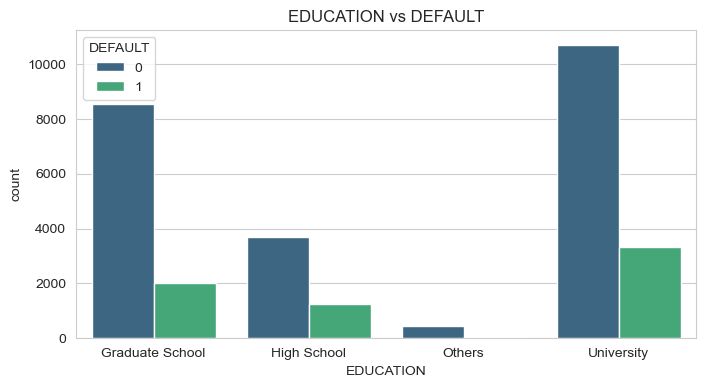

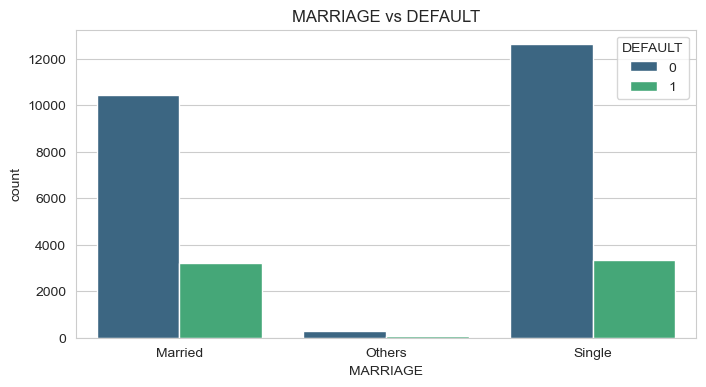

C:\Users\hp\AppData\Local\Temp\ipykernel_35136\4281261314.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='DEFAULT', y=col, palette='viridis')


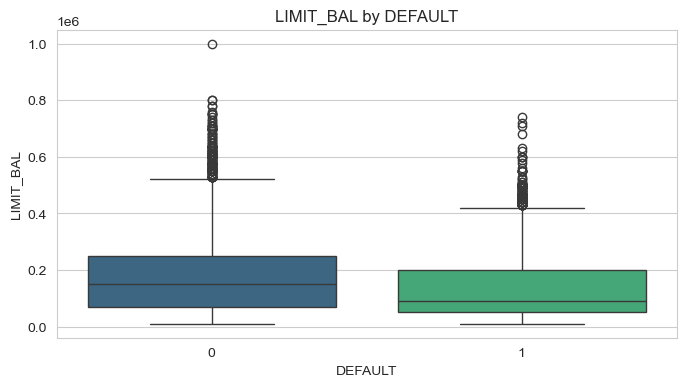

C:\Users\hp\AppData\Local\Temp\ipykernel_35136\4281261314.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='DEFAULT', y=col, palette='viridis')


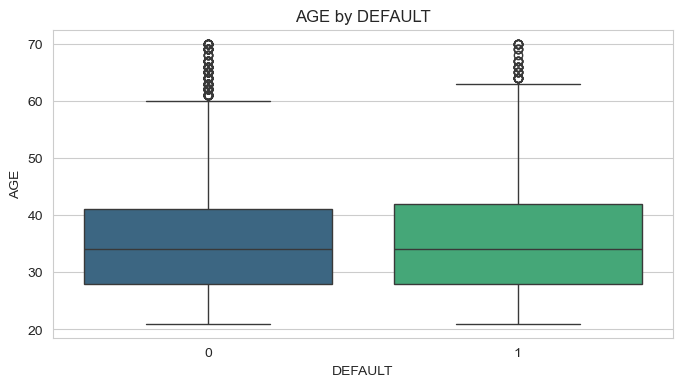

C:\Users\hp\AppData\Local\Temp\ipykernel_35136\4281261314.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='DEFAULT', y=col, palette='viridis')


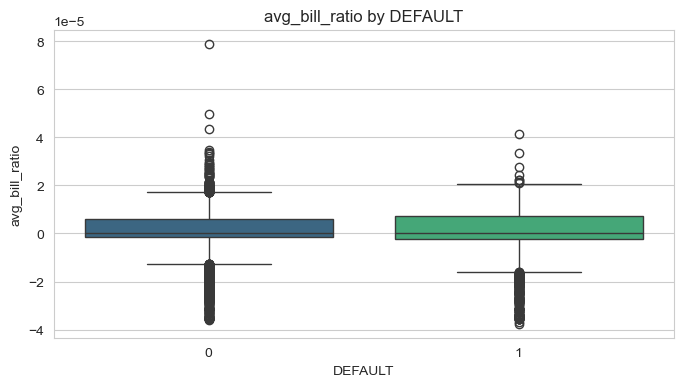

C:\Users\hp\AppData\Local\Temp\ipykernel_35136\4281261314.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='DEFAULT', y=col, palette='viridis')


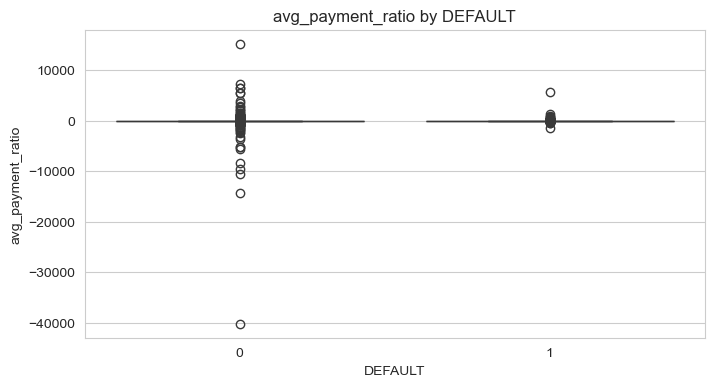

C:\Users\hp\AppData\Local\Temp\ipykernel_35136\4281261314.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='DEFAULT', y=col, palette='viridis')


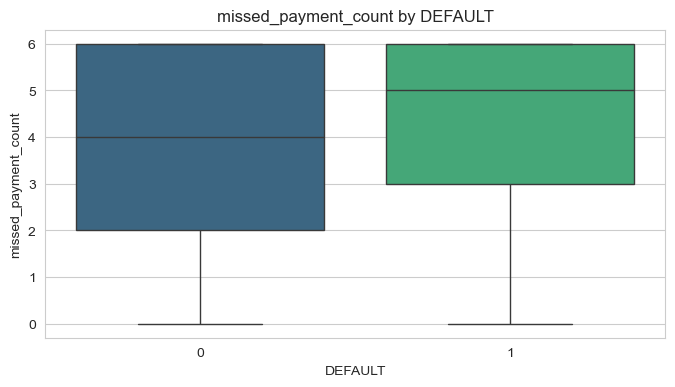

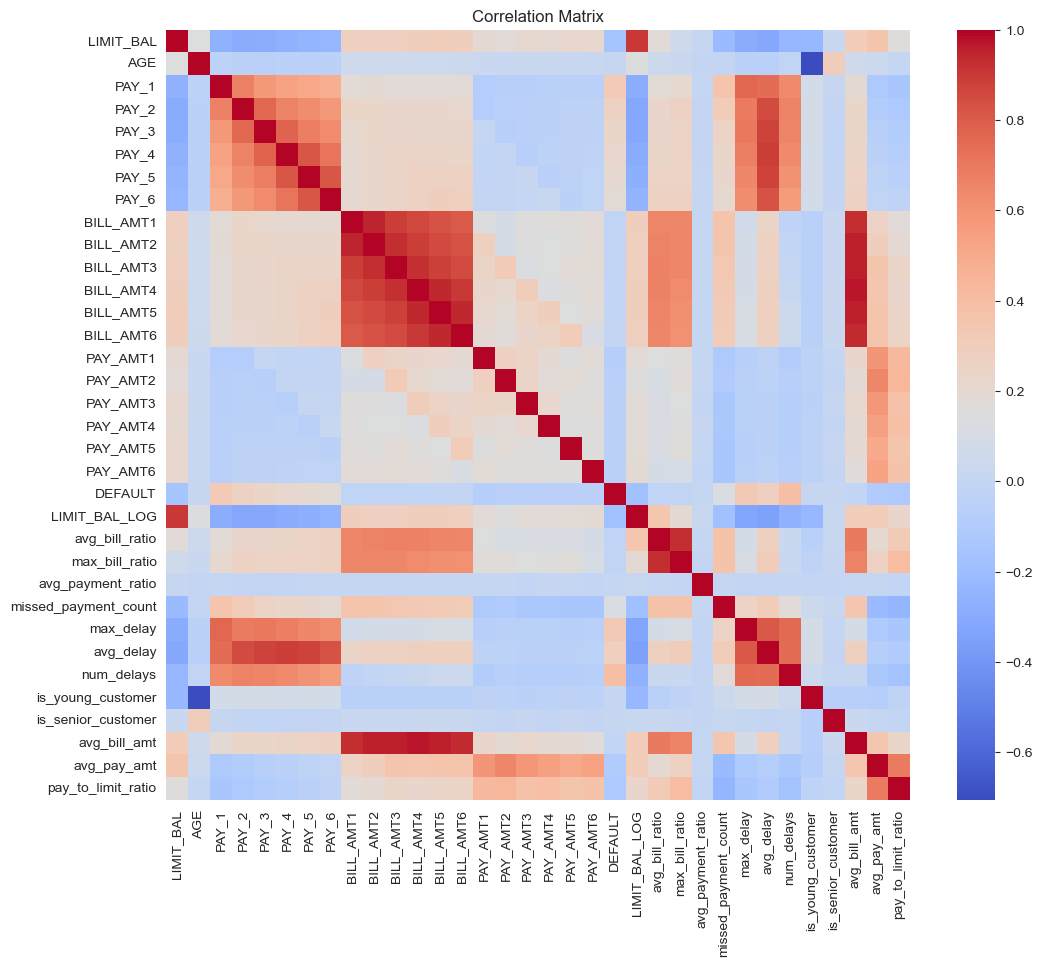

In [24]:
# Target variable distribution
sns.countplot(data=df, x='DEFAULT', palette='viridis')
plt.title('Target Variable Distribution: Default vs Non-Default')
plt.xlabel('Default (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Check proportions
print("Target Variable Proportions:")
print(df['DEFAULT'].value_counts(normalize=True))

# Categorical features vs target
for col in ['SEX','EDUCATION','MARRIAGE']:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue='DEFAULT', palette='viridis')
    plt.title(f'{col} vs DEFAULT')
    plt.show()

# Numeric features vs target (boxplots)
numeric_cols = ['LIMIT_BAL', 'AGE', 'avg_bill_ratio','avg_payment_ratio','missed_payment_count']
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(data=df, x='DEFAULT', y=col, palette='viridis')
    plt.title(f'{col} by DEFAULT')
    plt.show()

# Correlation Analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(12,10))
sns.heatmap(df[numeric_cols].corr(), annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Rename columns for better readability
rename_dict = {
    'LIMIT_BAL': 'Credit_Limit', 'SEX': 'Gender', 'EDUCATION': 'Education_Level',
    'MARRIAGE': 'Marital_Status', 'AGE': 'Age', 'DEFAULT': 'Default_Flag',
    'PAY_1': 'Last_Payment_Delay', 'PAY_2': 'Payment_Delay_2Months_Ago',
    'PAY_3': 'Payment_Delay_3Months_Ago', 'PAY_4': 'Payment_Delay_4Months_Ago',
    'PAY_5': 'Payment_Delay_5Months_Ago', 'PAY_6': 'Payment_Delay_6Months_Ago',
    'BILL_AMT1': 'Bill_Amount_Last_Month', 'BILL_AMT2': 'Bill_Amount_2Months_Ago',
    'BILL_AMT3': 'Bill_Amount_3Months_Ago', 'BILL_AMT4': 'Bill_Amount_4Months_Ago',
    'BILL_AMT5': 'Bill_Amount_5Months_Ago', 'BILL_AMT6': 'Bill_Amount_6Months_Ago',
    'PAY_AMT1': 'Payment_Amount_Last_Month', 'PAY_AMT2': 'Payment_Amount_2Months_Ago',
    'PAY_AMT3': 'Payment_Amount_3Months_Ago', 'PAY_AMT4': 'Payment_Amount_4Months_Ago',
    'PAY_AMT5': 'Payment_Amount_5Months_Ago', 'PAY_AMT6': 'Payment_Amount_6Months_Ago'
}
df = df.rename(columns=rename_dict)

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status'], drop_first=True)

# Prepare features and target
X = df_encoded.drop('Default_Flag', axis=1)
y = df_encoded['Default_Flag']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Original class distribution:")
print(y_train.value_counts())

# Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nResampled dataset shape:")
print(y_train_res.value_counts())

Original class distribution:
Default_Flag
0    18691
1     5309
Name: count, dtype: int64

Resampled dataset shape:
Default_Flag
0    18691
1    18691
Name: count, dtype: int64


In [28]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train_res, y_train_res)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:,1]

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print("=== Random Forest Results ===")
print(f"Accuracy: {acc_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"ROC-AUC: {auc_rf:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_res, y_train_res)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:,1]

acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print("\n=== XGBoost Results ===")
print(f"Accuracy: {acc_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(f"ROC-AUC: {auc_xgb:.4f}")

# Model Comparison
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [acc_rf, acc_xgb],
    'F1 Score': [f1_rf, f1_xgb],
    'AUC Score': [auc_rf, auc_xgb]
})

print("\n=== Model Comparison ===")
print(comparison_df)

=== Random Forest Results ===
Accuracy: 0.7923
F1-Score: 0.4964
ROC-AUC: 0.7507

Confusion Matrix:
[[4140  533]
 [ 713  614]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4673
           1       0.54      0.46      0.50      1327

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.79      6000



C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:199: UserWarning: [11:01:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost Results ===
Accuracy: 0.7878
F1-Score: 0.4729
ROC-AUC: 0.7459

=== Model Comparison ===
           Model  Accuracy  F1 Score  AUC Score
0  Random Forest  0.792333  0.496362   0.750735
1        XGBoost  0.787833  0.472878   0.745858


C:\Users\hp\AppData\Local\Temp\ipykernel_35136\627566121.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importance[:15].values, y=feat_importance[:15].index, palette="viridis")


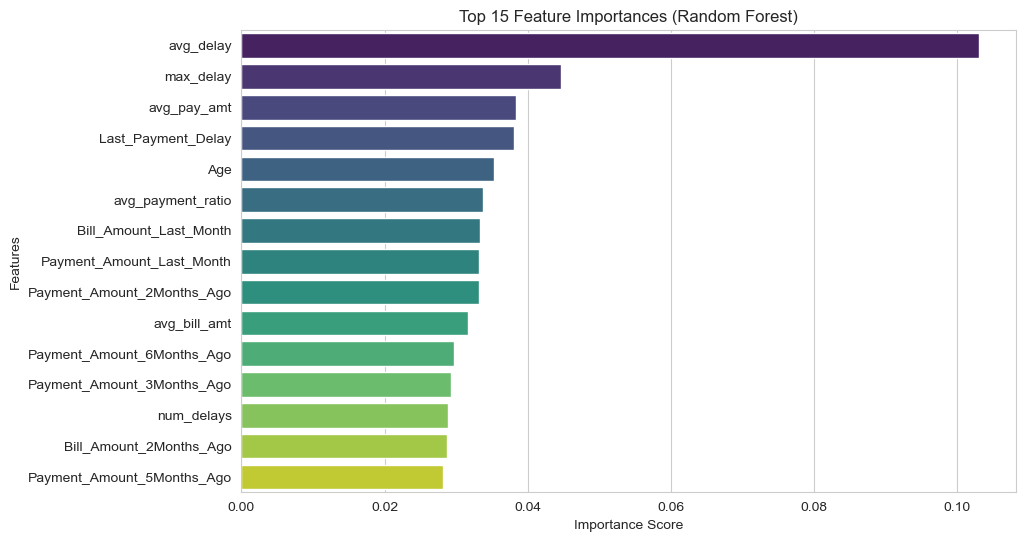

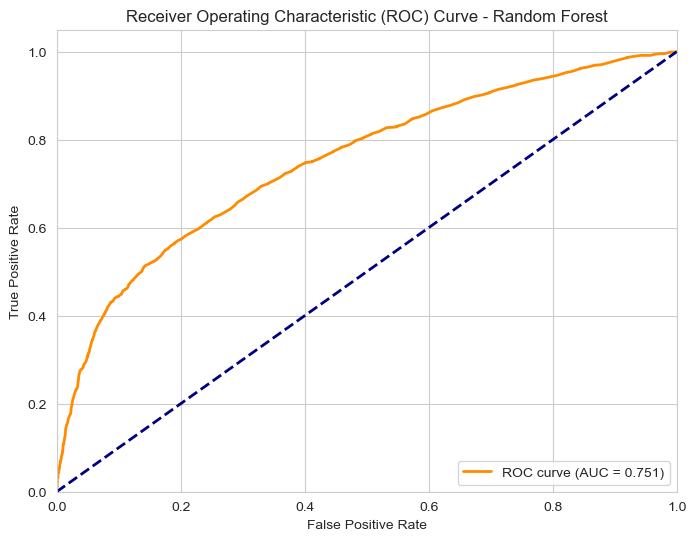

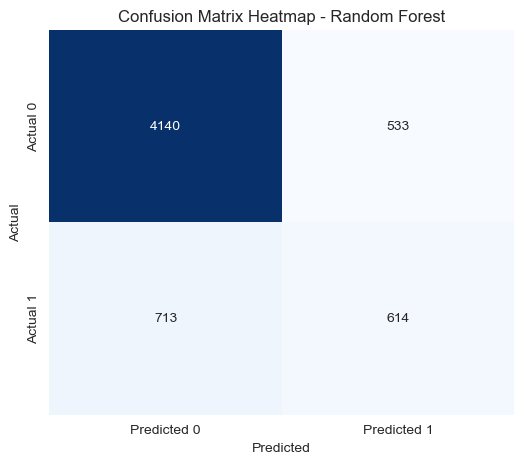

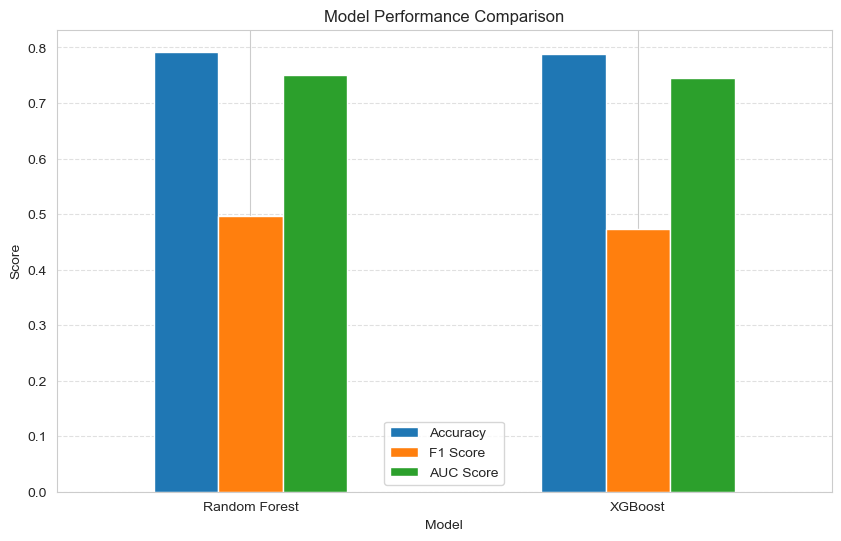

In [29]:
# Feature Importance
importances = rf_model.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance[:15].values, y=feat_importance[:15].index, palette="viridis")
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix Heatmap - Random Forest")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Model Comparison Visualization
comparison_plot = comparison_df.set_index('Model')
comparison_plot.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [32]:
# Add prediction probabilities to original dataset
df['RF_Prob'] = rf_model.predict_proba(X)[:,1]

# Save cleaned dataset with probabilities
file_path = r"C:\Users\hp\Desktop\Project Works and Files\Finance Project Credit Risk  Loan Analytics\DataSet\c_credit_data_with_prob.csv"
df.to_csv(file_path, index=False)

# Save as pickle (faster to load later)
pickle_path = r"C:\Users\hp\Desktop\Project Works and Files\Finance Project Credit Risk  Loan Analytics\DataSet\c_credit_data.pkl"
df.to_pickle(pickle_path)

print("✅ Dataset with probabilities saved successfully!")
print(f"CSV file: {file_path}")
print(f"Pickle file: {pickle_path}")

# Final dataset info
print(f"\nFinal dataset shape: {df.shape}")
print(f"Default probability range: {df['RF_Prob'].min():.3f} to {df['RF_Prob'].max():.3f}")

✅ Dataset with probabilities saved successfully!
CSV file: C:\Users\hp\Desktop\Project Works and Files\Finance Project Credit Risk  Loan Analytics\DataSet\c_credit_data_with_prob.csv
Pickle file: C:\Users\hp\Desktop\Project Works and Files\Finance Project Credit Risk  Loan Analytics\DataSet\c_credit_data.pkl

Final dataset shape: (30000, 38)
Default probability range: 0.000 to 1.000
